# Lab: Handling Data Imbalance in Classification Models

In this lab, we will build a classification model to predict customer churn and apply techniques to handle data imbalance.

In [1]:
# Step 1: Import necessary libraries

import pandas as pd              # For data handling (tables)
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For prettier visualizations

## Step 2: Load the dataset

We will load the `Customer-Churn.csv` file into a DataFrame called `churnData`.  
This file contains historical data from a telecom company, and our goal is to use it to predict customer churn.

In [2]:
# Step 2: Load the CSV file into a DataFrame

churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')

# Show the first 5 rows to confirm everything loaded correctly
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Step 3: Check column data types

We expect that the column `TotalCharges` should be numeric, but it appears as an object (string).  
We will convert it into a numeric column.

In [4]:
# Step 3: Check data types of all columns
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Convert 'TotalCharges' to numeric
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

# Check again to confirm the change
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Step 4: Check and handle null values

Now we'll check how many missing values exist and decide how to handle them.

In [6]:
# Step 4: Count missing values
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Replace missing values in TotalCharges with the mean
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean())

## Step 5: Feature selection and scaling

We will use the following numerical features for modeling:
- `tenure`
- `SeniorCitizen`
- `MonthlyCharges`
- `TotalCharges`

In [11]:
# Step 5.1: Feature selection
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churnData[features]

# Import the scaler
from sklearn.preprocessing import StandardScaler

# Create and apply the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier viewing
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Show the first rows of the scaled data
X_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.277445,-0.439916,-1.160323,-0.994971
1,0.066327,-0.439916,-0.259629,-0.173876
2,-1.236724,-0.439916,-0.362660,-0.960399
3,0.514251,-0.439916,-0.746535,-0.195400
4,-1.236724,-0.439916,0.197365,-0.941193


### Why we use StandardScaler instead of Normalizer

We are using `StandardScaler` because our features (tenure, SeniorCitizen, MonthlyCharges, TotalCharges) represent independent numerical variables with different ranges.

`StandardScaler` standardizes each feature by removing the mean and scaling to unit variance, which is appropriate for models like Logistic Regression that are sensitive to the scale of input features.

In contrast, `Normalizer` scales each individual **row** (not column) to have unit norm, which is useful for direction-based data (like text vectors), but not suitable here.

In [12]:
# Step 5.2: Train-test split

from sklearn.model_selection import train_test_split

# Define the target variable
y = churnData['Churn']

# Convert target to binary: Yes -> 1, No -> 0
y = y.map({'Yes': 1, 'No': 0})

# Split the data (default test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5282, 4), (1761, 4), (5282,), (1761,))

### Fit a logistic regression model

We will use a Logistic Regression model to classify whether a customer will churn or not.  
We will train the model using the training data only.


In [14]:
# Step 5.3: Fit logistic regression

from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Fit it to the training data
model.fit(X_train, y_train)

LogisticRegression()

### Evaluate accuracy on test data

Now that the model has been trained, we will evaluate its performance using the test data.  
We will use `accuracy_score` to see how many predictions the model got right.

In [16]:
# Step 5.4: Predict and evaluate accuracy

from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")

Accuracy on test data: 0.78


### Conclusion

The model was able to predict correctly 78% of the test cases.  
This is a good starting point. However, we still need to check if the data is imbalanced, because that could affect how reliable this result really is.


## Step 6: Check for imbalance in the target variable

Before fixing the imbalance, we need to check if it exists.  
We will count how many customers churned (`Yes`) vs. how many stayed (`No`).


Churn
0    5174
1    1869
Name: count, dtype: int64


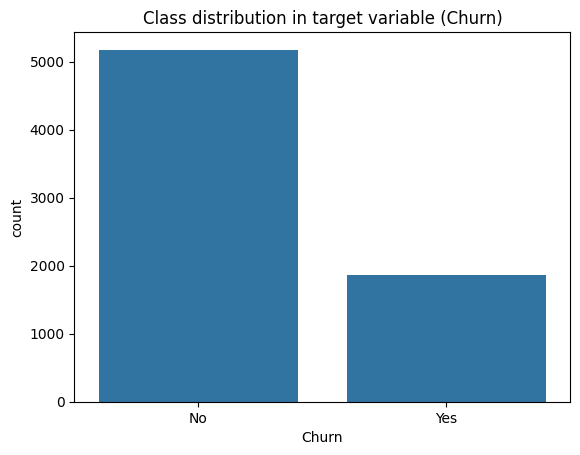

In [18]:
# Step 6.1: Count churn values

churn_counts = y.value_counts()
print(churn_counts)

# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Class distribution in target variable (Churn)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

## Step 7: Downsampling the majority class

We will balance the classes by randomly reducing the number of `No` cases (majority class), so that it matches the number of `Yes` cases (minority class).  
This creates a smaller, balanced dataset.

In [19]:
# Step 7: Downsampling

# Concatenate X and y to keep them together
df_down = pd.concat([X_scaled, y], axis=1)

# Separate minority and majority
yes_churn = df_down[df_down['Churn'] == 1]
no_churn = df_down[df_down['Churn'] == 0]

# Downsample majority class
no_churn_downsampled = no_churn.sample(len(yes_churn), random_state=0)

# Combine both
df_downsampled = pd.concat([yes_churn, no_churn_downsampled])

# Shuffle
df_downsampled = df_downsampled.sample(frac=1, random_state=0)

# Split back into X and y
X_down = df_downsampled.drop('Churn', axis=1)
y_down = df_downsampled['Churn']

# Split again into train and test sets
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, random_state=0)

# Train and evaluate model
model_down = LogisticRegression()
model_down.fit(X_train_down, y_train_down)
y_pred_down = model_down.predict(X_test_down)

# Accuracy
accuracy_down = accuracy_score(y_test_down, y_pred_down)
print(f"Downsampling - Accuracy on test set: {accuracy_down:.2f}")

Downsampling - Accuracy on test set: 0.72


### Downsampling – Conclusion

After applying downsampling to balance the dataset, the model's accuracy dropped from 78% to 72%.

This is normal because we reduced the amount of training data.  However, the model is now more fair and less biased towards the majority class.

In the next step, we will try upsampling to balance the classes without removing any data.


## Step 8: Upsampling the minority class

In this step, we will increase the number of `Yes` (churned) cases by randomly duplicating them.  This allows us to balance the classes without losing any data from the majority class.

Then, we will train a new logistic regression model and check its accuracy.

In [22]:
# Step 8: Upsampling

# Concatenate X and y again
df_up = pd.concat([X_scaled, y], axis=1)

# Separate classes
yes_churn = df_up[df_up['Churn'] == 1]
no_churn = df_up[df_up['Churn'] == 0]

# Upsample the minority class
yes_churn_upsampled = yes_churn.sample(len(no_churn), replace=True, random_state=0)

# Combine both
df_upsampled = pd.concat([no_churn, yes_churn_upsampled])

# Shuffle the dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=0)

# Separate X and y again
X_up = df_upsampled.drop('Churn', axis=1)
y_up = df_upsampled['Churn']

# Train-test split
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, random_state=0)

# Train and evaluate
model_up = LogisticRegression()
model_up.fit(X_train_up, y_train_up)
y_pred_up = model_up.predict(X_test_up)

# Accuracy
accuracy_up = accuracy_score(y_test_up, y_pred_up)
print(f"Upsampling - Accuracy on test set: {accuracy_up:.2f}")

Upsampling - Accuracy on test set: 0.74


### Upsampling – Conclusion

The upsampled model reached an accuracy of 74%, which is slightly lower than the original 78%.  
However, this is expected and not a problem.

By duplicating the minority class (`Churn = Yes`), the model sees more examples of customers who actually leave.  
This helps it learn to detect churn cases better, instead of focusing too much on the majority (`No`) class.

In real-life business situations, identifying churners is more important than having the highest possible accuracy.  
The upsampled model is more useful because it gives better attention to the customers we want to prevent from leaving.